In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import optuna
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,  IsolationForest , RandomForestClassifier
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import early_stopping
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

%matplotlib inline

In [2]:
from bayes_opt import BayesianOptimization

In [3]:
df1=pd.read_csv("playground-series-s3e16/train.csv")

In [4]:
df1.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [6]:
df1.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [7]:
df1["Sex"].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

In [8]:
dftest=pd.read_csv("playground-series-s3e16/test.csv")

In [9]:
dftest.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

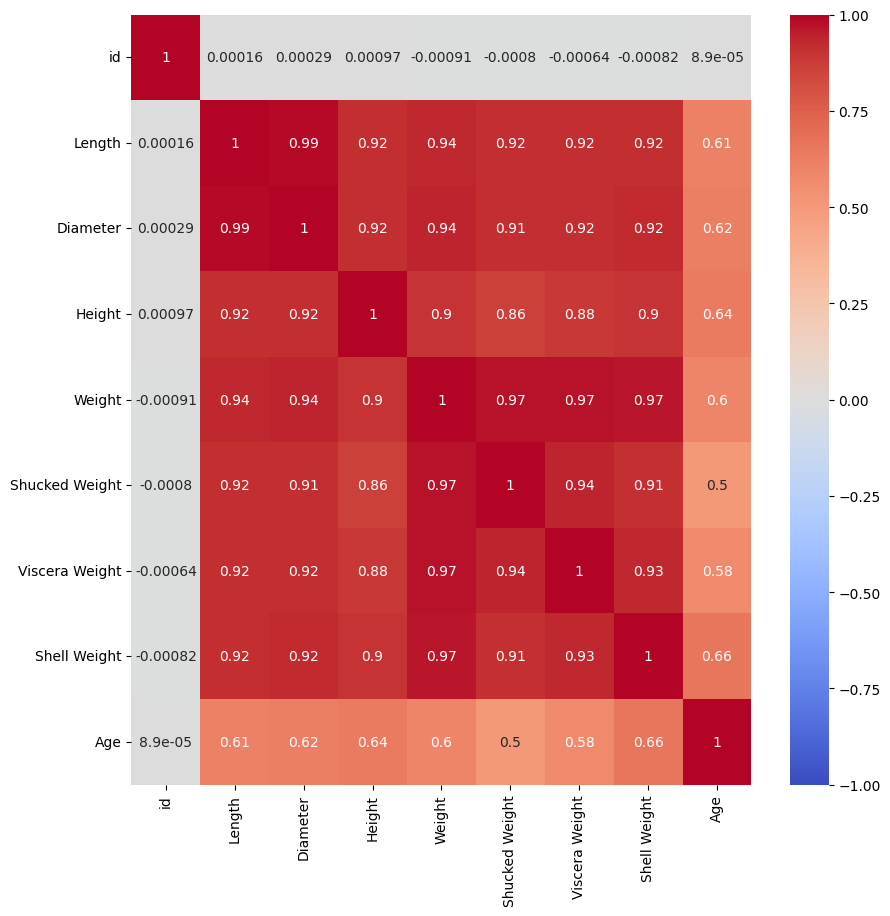

In [10]:
corr=df1.drop(['Sex'],axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,cmap="coolwarm")
plt.show()

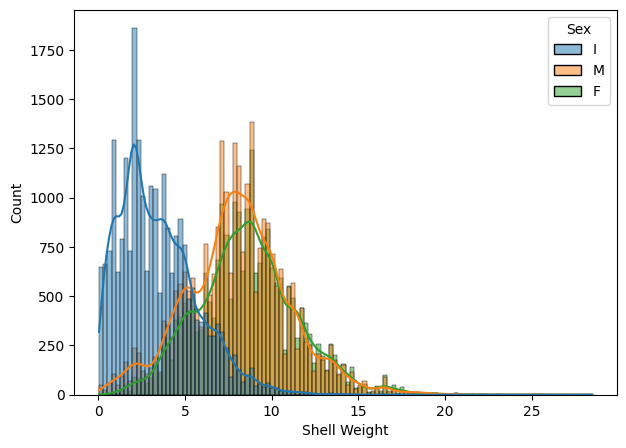

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(data=df1, x="Shell Weight",hue="Sex",kde=True)
plt.show()

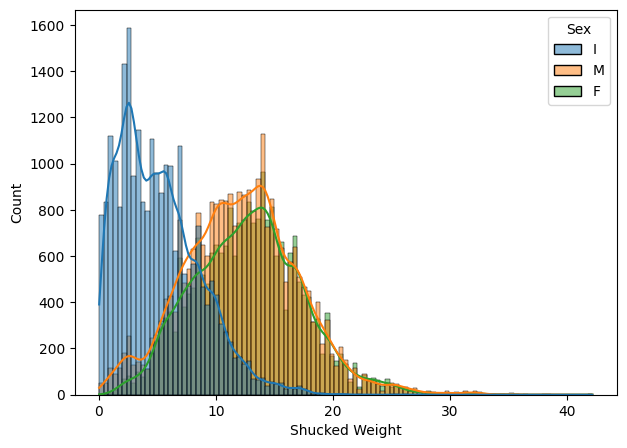

In [12]:
plt.figure(figsize=(7,5))
sns.histplot(data=df1 ,x="Shucked Weight",hue="Sex",kde=True)
plt.show()

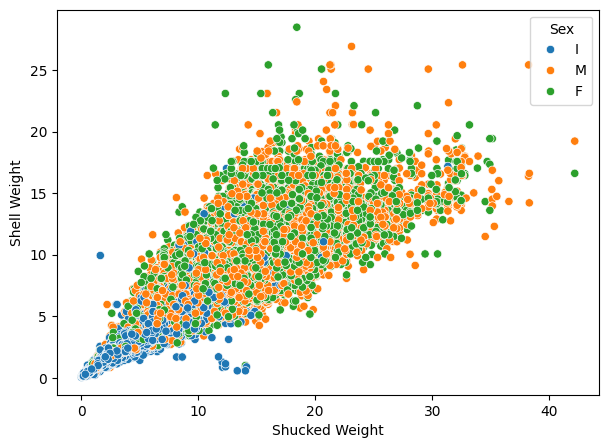

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df1 ,x="Shucked Weight",y="Shell Weight",hue="Sex")
plt.show()

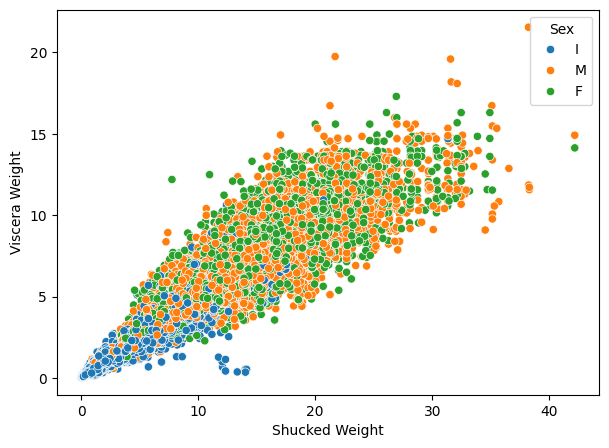

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df1 ,x="Shucked Weight",y="Viscera Weight",hue="Sex")
plt.show()

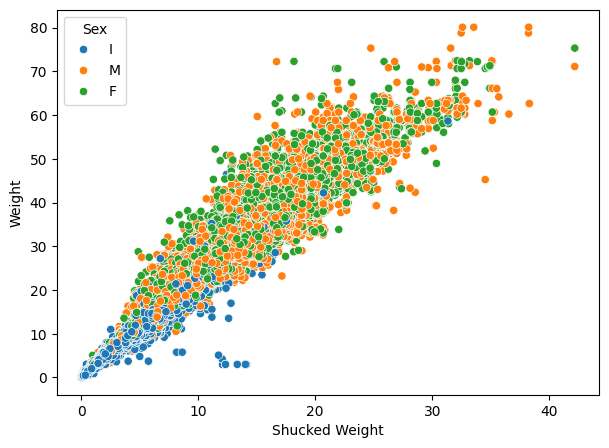

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df1 ,x="Shucked Weight",y="Weight",hue="Sex")
plt.show()

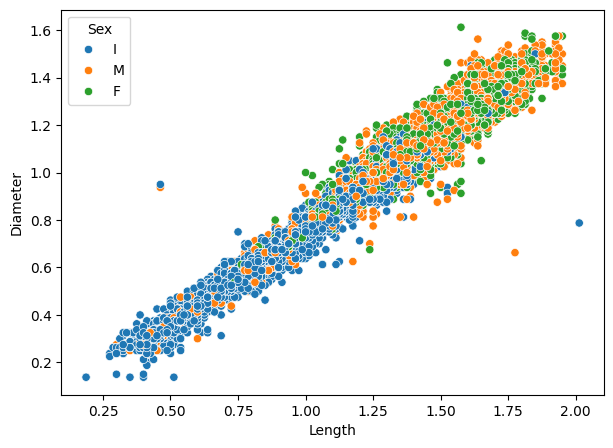

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df1 ,x="Length",y="Diameter",hue="Sex")
plt.show()

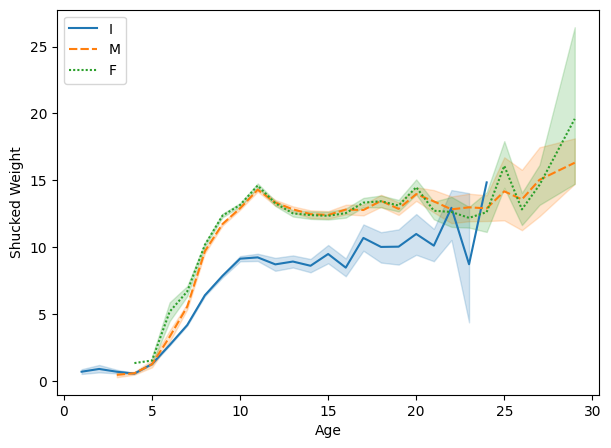

In [17]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df1, x="Age", y="Shucked Weight",hue="Sex",style="Sex")
plt.legend()
plt.show()

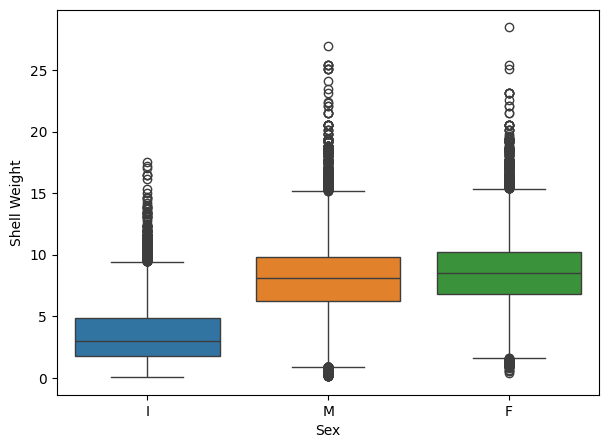

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df1, y="Shell Weight", x="Sex", hue="Sex")
plt.show()

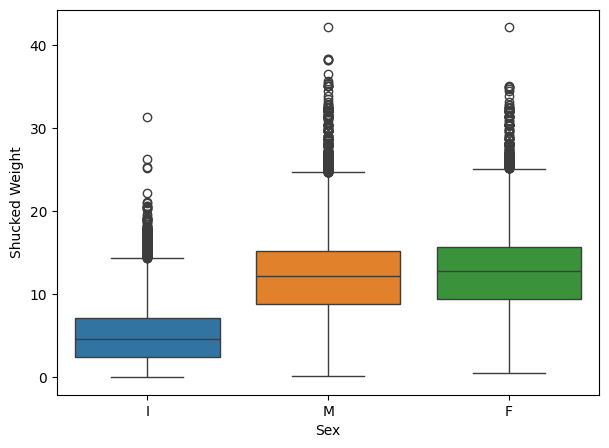

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df1, y="Shucked Weight", x="Sex", hue="Sex")
plt.show()

In [20]:
label_encoder = LabelEncoder()
df1["Sex"]=label_encoder.fit_transform(df1["Sex"])
df1.drop("id",axis=1,inplace=True)
df1.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [21]:
# def remove_outliers(df, column):
#     mean_value = df[column].mean()
#     std_deviation = df[column].std()
#     upper_limit = mean_value + 3 * std_deviation
#     lower_limit = mean_value - 3 * std_deviation
#     print(f"Mean value of {column}: {mean_value}")
#     print(f"Standard deviation of {column}: {std_deviation}")
#     print(f"Minimum value of {column}: {df[column].min()}")
#     print(f"Maximum value of {column}: {df[column].max()}")
#     print(f"Upper Limit is: {upper_limit}")
#     print(f"Lower Limit is: {lower_limit}")
#     df_cleaned = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
#     return df_cleaned

In [22]:
# df_cleaned = df1.copy()
# df_cleaned = remove_outliers(df_cleaned, 'Shucked Weight')


In [23]:
# df_cleaned = remove_outliers(df_cleaned, 'Viscera Weight')


In [24]:
# df_cleaned = remove_outliers(df_cleaned, 'Shell Weight')

In [25]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df1['anomaly'] = iso_forest.fit_predict(df1.drop(['Age', 'Sex'], axis=1))
df_cleaned = df1[df1['anomaly'] == 1].drop(columns='anomaly')


In [65]:
df1=df_cleaned

In [66]:
# df_cleaned = remove_outliers(df_cleaned, 'Weight')

In [67]:
print("Cleaned dataset after removing outliers:")
print(df_cleaned)

Cleaned dataset after removing outliers:
       Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0        1  1.5250    1.1750  0.3750  28.973189       12.728926   
1        1  1.1000    0.8250  0.2750  10.418441        4.521745   
2        2  1.3875    1.1125  0.3750  24.777463       11.339800   
4        1  1.2500    1.0125  0.3375  23.289114       11.977664   
5        2  1.5000    1.1750  0.4125  28.845616       13.409313   
...    ...     ...       ...     ...        ...             ...   
74046    0  1.6625    1.2625  0.4375  50.660556       20.680960   
74047    1  1.0750    0.8625  0.2750  10.446791        4.323299   
74048    0  1.4875    1.2000  0.4125  29.483480       12.303683   
74049    1  1.2125    0.9625  0.3125  16.768729        8.972617   
74050    1  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Age  
0            6.647958      8.348928    9  
1            2.324659      3.401940    8  
2            5.556502    

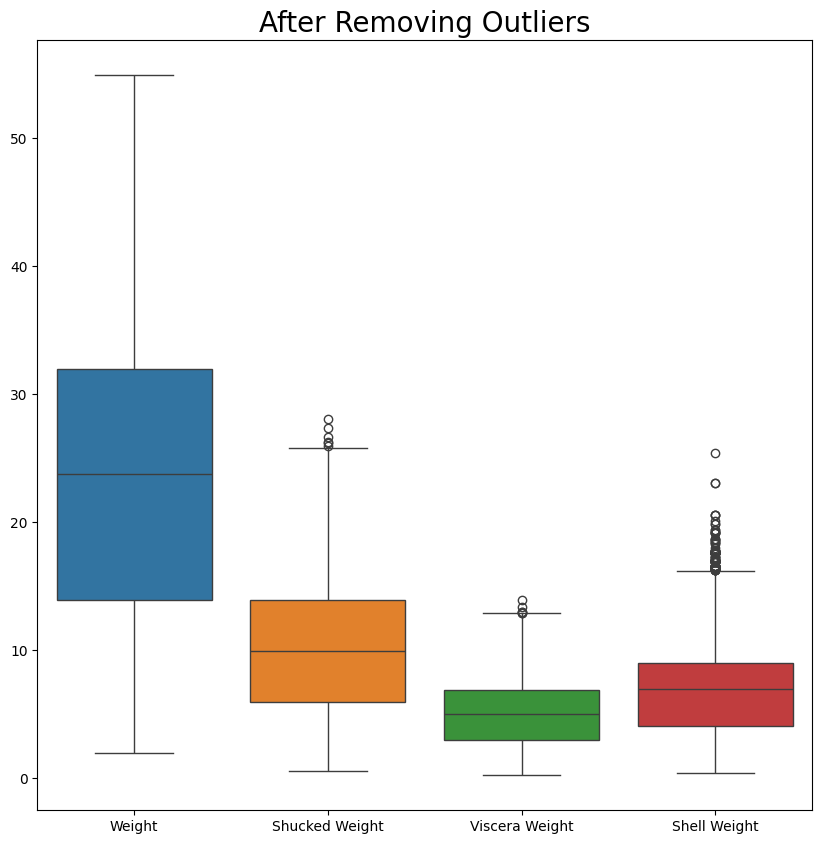

In [68]:
col_scale = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
plt.figure(figsize=(10,10))
sns.boxplot(data=df1[col_scale])
plt.title("After Removing Outliers",fontsize=20)
plt.show()

In [69]:
df1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(df1.drop(['Age'],axis=1),df1['Age'],test_size=0.2,random_state=42)

In [71]:
X_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
70939,2,1.4125,1.1125,0.4375,29.724451,11.920965,6.307764,8.788345
2577,2,1.5875,1.2500,0.4375,37.407165,15.067759,8.887568,9.780577
41771,0,1.5625,1.2125,0.4000,30.107169,13.919605,6.378637,8.079607
33898,2,1.6625,1.2625,0.3750,32.360954,14.699216,6.775531,8.632423
52558,1,0.9500,0.6625,0.2500,6.803880,2.948348,1.077281,2.409708
...,...,...,...,...,...,...,...,...
39141,0,1.4500,1.1250,0.4500,36.273185,16.201739,7.909510,11.169703
6601,0,1.1875,0.9625,0.3125,18.016107,7.328346,3.770484,4.394172
57758,2,1.4375,1.1000,0.3375,25.769696,12.289508,5.060386,9.185238
922,2,1.5250,1.1500,0.4250,30.121344,14.132226,6.251065,8.930093


In [72]:
def rf_cv(n_estimators, max_depth, min_samples_split):
    val = cross_val_score(
        RandomForestRegressor(
            n_estimators=int(n_estimators), 
            max_depth=int(max_depth), 
            min_samples_split=int(min_samples_split), 
            random_state=42
        ), 
        X_train, Y_train, scoring='r2', cv=5
    ).mean()
    return val

In [73]:
params = {
    'n_estimators': (10, 300),
    'max_depth': (1, 20),
    'min_samples_split': (2, 10)
}
rf_bo = BayesianOptimization(rf_cv, params, random_state=42)
rf_bo.maximize(init_points=5, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.5387    | 8.116     | 9.606     | 222.3     |
| 2         | 0.5363    | 12.37     | 3.248     | 55.24     |
| 3         | 0.3888    | 2.104     | 8.929     | 184.3     |
| 4         | 0.5352    | 14.45     | 2.165     | 291.3     |
| 5         | 0.527     | 16.82     | 3.699     | 62.73     |
| 6         | 0.542     | 10.4      | 8.549     | 253.2     |
| 7         | 0.5104    | 14.42     | 2.036     | 10.6      |
| 8         | 0.5419    | 10.91     | 7.571     | 254.4     |
| 9         | 0.2913    | 1.0       | 10.0      | 105.4     |
| 10        | 0.5234    | 20.0      | 2.0       | 234.3     |
| 11        | 0.2913    | 1.0       | 10.0      | 279.5     |
| 12        | 0.2913    | 1.0       | 2.0       | 237.6     |
| 13        | 0.5302    | 20.0      | 9.328     | 221.8     |
| 14        | 0.5311    | 20.0      | 10.0      | 248.0     |
| 15    

In [74]:
best_params = rf_bo.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])

In [75]:
random_regr= RandomForestRegressor(**best_params, random_state=0)
random_regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, min_samples_split=8, n_estimators=253,
                      random_state=0)

In [76]:
rfr_pred=random_regr.predict(X_test)
mse1 = mean_squared_error(Y_test,rfr_pred)
print("Mean Squared Error:", mse1)
mae1= mean_absolute_error(Y_test,rfr_pred)
print("Mean Absolute Error:", mae1)
r21 = r2_score(Y_test,rfr_pred)
print("R2 Score:", r21)

Mean Squared Error: 4.163454021055414
Mean Absolute Error: 1.4086630848691117
R2 Score: 0.5619841298488548


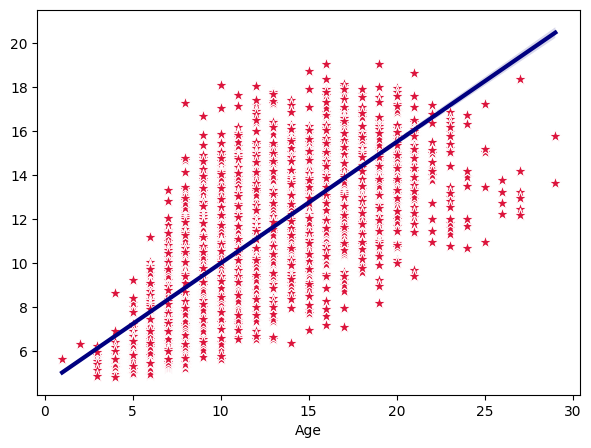

In [77]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=rfr_pred,color="navy",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=rfr_pred,color="crimson",marker="*",s=100)

plt.show()

In [78]:
def objective(trial):
    # Suggest hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Create the model with the suggested hyperparameters
    gb = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        random_state=0
    )

    # Perform cross-validation
    cv_scores = cross_val_score(gb, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

    # Return the negative mean of the cross-validation scores
    return -cv_scores.mean()

In [79]:
study = optuna.create_study(direction='minimize')  # We want to minimize the error
study.optimize(objective, n_trials=10)  # Perform 10 optimization trials

# Print the best hyperparameters found
print("Best hyperparameters: ", study.best_params)


[I 2024-08-30 21:37:20,418] A new study created in memory with name: no-name-941a13bc-eef0-4b3a-bc5b-1d39aa0b17f5
[I 2024-08-30 21:38:05,726] Trial 0 finished with value: 5.11905766020888 and parameters: {'n_estimators': 474, 'learning_rate': 0.2561554721032334, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 13, 'subsample': 0.6844698935887816, 'max_features': 'sqrt'}. Best is trial 0 with value: 5.11905766020888.
[I 2024-08-30 21:38:51,906] Trial 1 finished with value: 5.500935561625132 and parameters: {'n_estimators': 339, 'learning_rate': 0.26968884676560584, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'subsample': 0.639823768959138, 'max_features': 'log2'}. Best is trial 0 with value: 5.11905766020888.
[I 2024-08-30 21:39:00,625] Trial 2 finished with value: 4.332290215654434 and parameters: {'n_estimators': 77, 'learning_rate': 0.09197900824536319, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 1, 'subsample': 0.6959541872093402, 'max

Best hyperparameters:  {'n_estimators': 240, 'learning_rate': 0.07114409150460907, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 18, 'subsample': 0.6173459365952652, 'max_features': 'sqrt'}


In [80]:
best_params = study.best_params

In [81]:
gb = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    max_features=best_params['max_features'],
    random_state=0
)
gb.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.07114409150460907, max_depth=7,
                          max_features='sqrt', min_samples_leaf=18,
                          min_samples_split=9, n_estimators=240, random_state=0,
                          subsample=0.6173459365952652)

In [82]:
gb_pred=gb.predict(X_test)
mse2 = mean_squared_error(Y_test,gb_pred)
print("Mean Squared Error:", mse2)
mae2= mean_absolute_error(Y_test,gb_pred)
print("Mean Absolute Error:", mae2)
r22 = r2_score(Y_test,gb_pred)
print("R2 Score:", r22)

Mean Squared Error: 4.140484257479722
Mean Absolute Error: 1.4065207685638232
R2 Score: 0.5644006621148272


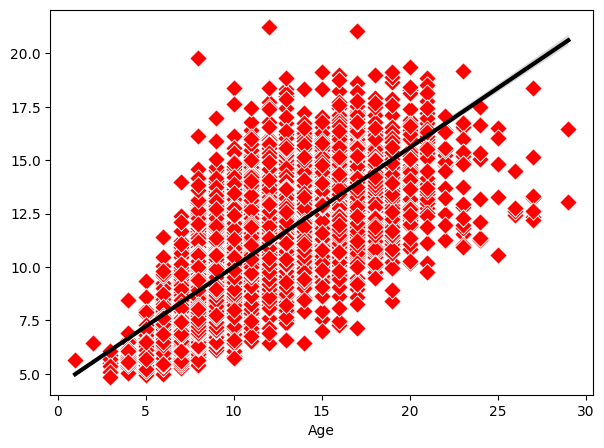

In [83]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=gb_pred,color="black",line_kws={'linewidth': 3},scatter=False)

sns.scatterplot(x=Y_test, y=gb_pred,color="red",marker="D",s=80)

plt.show()

In [84]:
rd=Ridge(alpha=1.0)
rd.fit(X_train,Y_train)

Ridge()

In [85]:
rd_pred=rd.predict(X_test)
mse4 = mean_squared_error(Y_test,rd_pred)
print("Mean Squared Error:", mse4)
mae4= mean_absolute_error(Y_test,rd_pred)
print("Mean Absolute Error:", mae4)
r24 = r2_score(Y_test,rd_pred)
print("R2 Score:", r24)

Mean Squared Error: 4.500504668351652
Mean Absolute Error: 1.4979784852605584
R2 Score: 0.5265247416068192


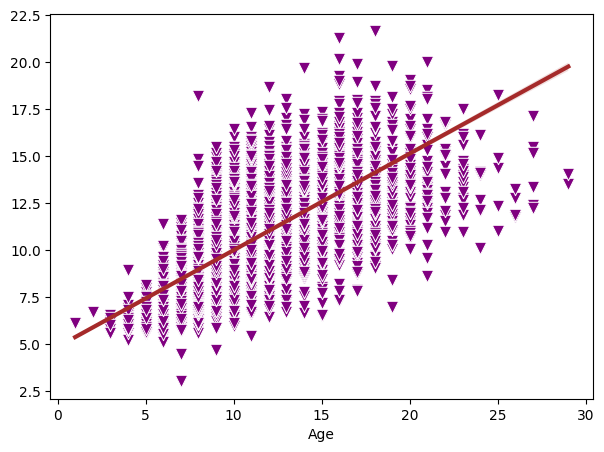

In [86]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=rd_pred,color="brown",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=rd_pred,color="purple",marker="v",s=80)

plt.show()

In [87]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse','mae'],
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [88]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
callbacks = [lgb.early_stopping(5),lgb.log_evaluation()]


In [89]:
lgb_model = lgb.train(params,train_set=lgb_train,valid_sets=[lgb_train, lgb_eval],callbacks=callbacks)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[1]	training's rmse: 2.97768	training's l1: 2.18373	valid_1's rmse: 3.00488	valid_1's l1: 2.20353
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.90763	training's l1: 2.13225	valid_1's rmse: 2.93364	valid_1's l1: 2.1511
[3]	training's rmse: 2.84169	training's l1: 2.08314	valid_1's rmse: 2.86632	valid_1's l1: 2.10109
[4]	training's rmse: 2.78139	training's l1: 2.03742	valid_1's rmse: 2.80467	valid_1's l1: 2.05457
[5]	training's rmse: 2.72482	training's l1: 1.99322	valid_1's rmse: 2.74663	valid_1's l1: 2.00967
[6]	training's rmse: 2.67274	training's l1: 1.95246	valid_1's rmse: 2.6934	valid_1's l1: 1.96841
[7]	training's rmse: 2.62847	training's l1: 1.91683	valid_1's rmse: 2.64801	valid_1's l1: 1.93217
[8]	training's rmse: 2.58637	training's l1: 1.88302	valid_1's rmse: 2.60587	valid_1's l1: 1.8978

In [90]:
lgb_pred=lgb_model.predict(X_test)
mse5 = mean_squared_error(Y_test,lgb_pred)
print("Mean Squared Error:", mse5)
mae5= mean_absolute_error(Y_test,lgb_pred)
print("Mean Absolute Error:", mae5)
r25 = r2_score(Y_test,lgb_pred)
print("R2 Score:", r25)

Mean Squared Error: 4.1169161614039975
Mean Absolute Error: 1.4033194707316892
R2 Score: 0.5668801419068958


In [91]:
all_mse_score = [ mse1, mse2, mse4, mse5]
all_mae_score = [mae1, mae2, mae4, mae5]
all_r2_score = [ r21, r22, r24, r25]
all_model = ['random_regr', 'gb', 'rd','lgb_model', ]

data = {'Model': all_model,'MSE': all_mse_score,'MAE': all_mae_score,'R2_Score': all_r2_score}
df = pd.DataFrame(data)


In [92]:
df

,Model,MSE,MAE,R2_Score
0,random_regr,4.163454,1.408663,0.561984
1,gb,4.140484,1.406521,0.564401
2,rd,4.500505,1.497978,0.526525
3,lgb_model,4.116916,1.403319,0.566880


/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_51672/2141810127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model", x="R2_Score", data=df, palette="Dark2")


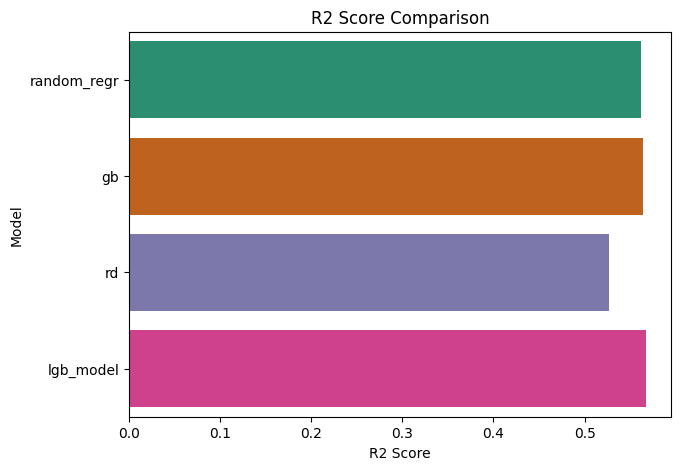

In [93]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="R2_Score", data=df, palette="Dark2")
plt.title('R2 Score Comparison')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_51672/3622257182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model", x="MSE", data=df, palette="Set1")


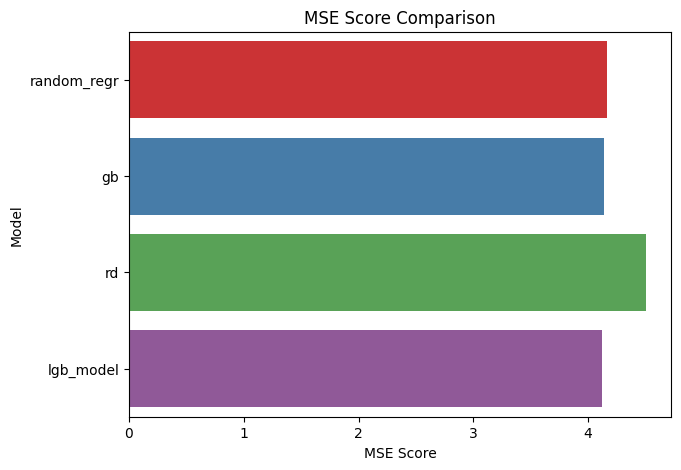

In [94]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MSE", data=df, palette="Set1")
plt.title('MSE Score Comparison')
plt.xlabel('MSE Score')
plt.ylabel('Model')
plt.show()

/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_51672/1578858516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model", x="MAE", data=df, palette="tab10")


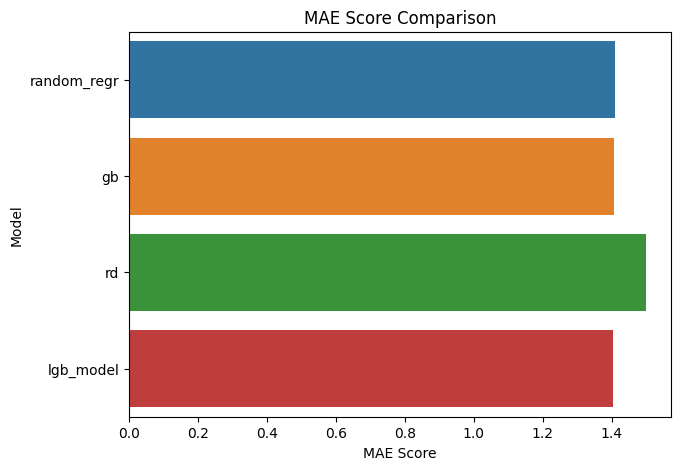

In [95]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MAE", data=df, palette="tab10")
plt.title('MAE Score Comparison')
plt.xlabel('MAE Score')
plt.ylabel('Model')
plt.show()

In [96]:
df2=pd.read_csv("playground-series-s3e16/test.csv")

In [97]:
df2.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [98]:
df2.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [99]:
df2.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [100]:
df2["Sex"]=label_encoder.fit_transform(df2["Sex"])
df2.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [101]:
X_train.columns,df2.columns

(Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
        'Viscera Weight', 'Shell Weight'],
       dtype='object'),
 Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
        'Viscera Weight', 'Shell Weight'],
       dtype='object'))

In [102]:
prediction=rd.predict(df2.drop(['id'],axis=1))

In [103]:
prediction

array([ 8.0347053 ,  8.1324721 ,  9.92765995, ..., 12.40492723,
        9.56146353, 12.78634285])

In [104]:
import shap

In [105]:
explainer = shap.LinearExplainer(rd, X_train, feature_perturbation="interventional")



/Users/saahil/Desktop/Coding_Projects/ML/SeaLife/venv/lib/python3.9/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [106]:
X_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
70939,2,1.4125,1.1125,0.4375,29.724451,11.920965,6.307764,8.788345
2577,2,1.5875,1.2500,0.4375,37.407165,15.067759,8.887568,9.780577
41771,0,1.5625,1.2125,0.4000,30.107169,13.919605,6.378637,8.079607
33898,2,1.6625,1.2625,0.3750,32.360954,14.699216,6.775531,8.632423
52558,1,0.9500,0.6625,0.2500,6.803880,2.948348,1.077281,2.409708
...,...,...,...,...,...,...,...,...
39141,0,1.4500,1.1250,0.4500,36.273185,16.201739,7.909510,11.169703
6601,0,1.1875,0.9625,0.3125,18.016107,7.328346,3.770484,4.394172
57758,2,1.4375,1.1000,0.3375,25.769696,12.289508,5.060386,9.185238
922,2,1.5250,1.1500,0.4250,30.121344,14.132226,6.251065,8.930093


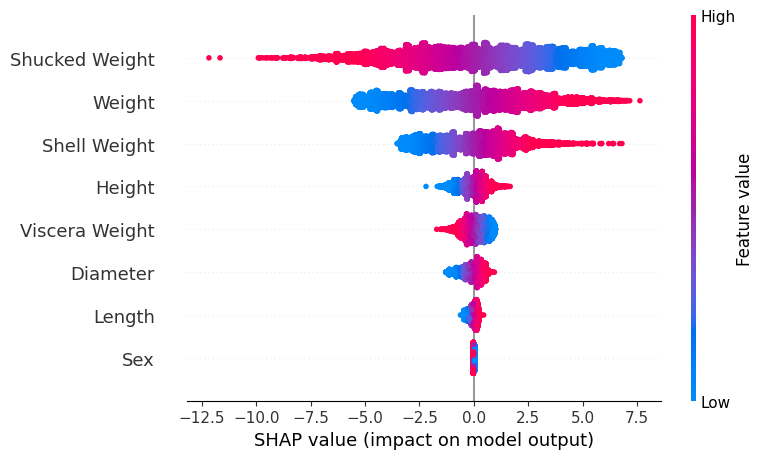

In [107]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)



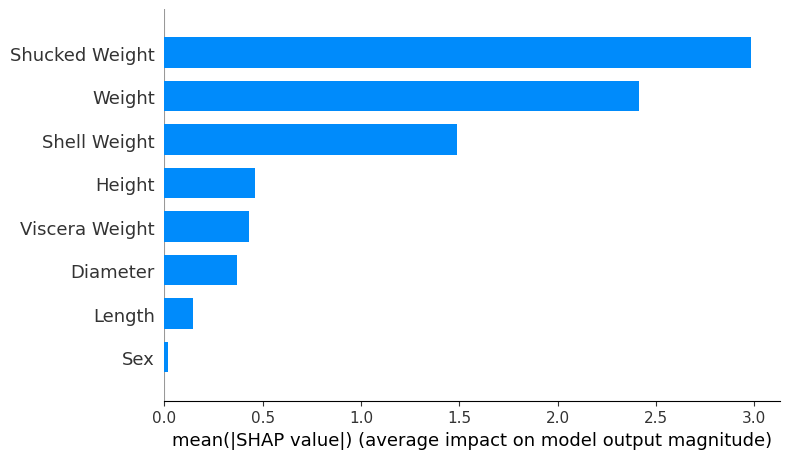

In [108]:
# Feature importance plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


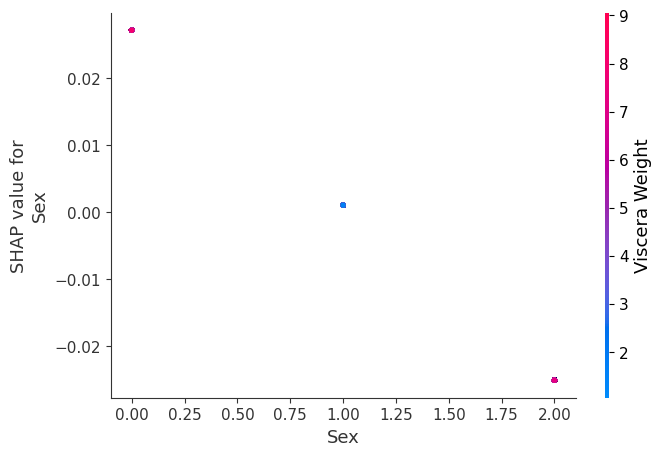

In [109]:

# SHAP dependence plot for the first feature
shap.dependence_plot(0, shap_values, X_test)

In [110]:
instance_idx = 0  # Change this index to visualize other instances
instance_shap_values = shap_values[instance_idx]
instance_data = X_test.iloc[instance_idx]




In [111]:
instance_data

Sex                0.000000
Length             1.612500
Diameter           1.225000
Height             0.437500
Weight            34.685613
Shucked Weight    15.039410
Viscera Weight     8.391452
Shell Weight       8.930093
Name: 137, dtype: float64

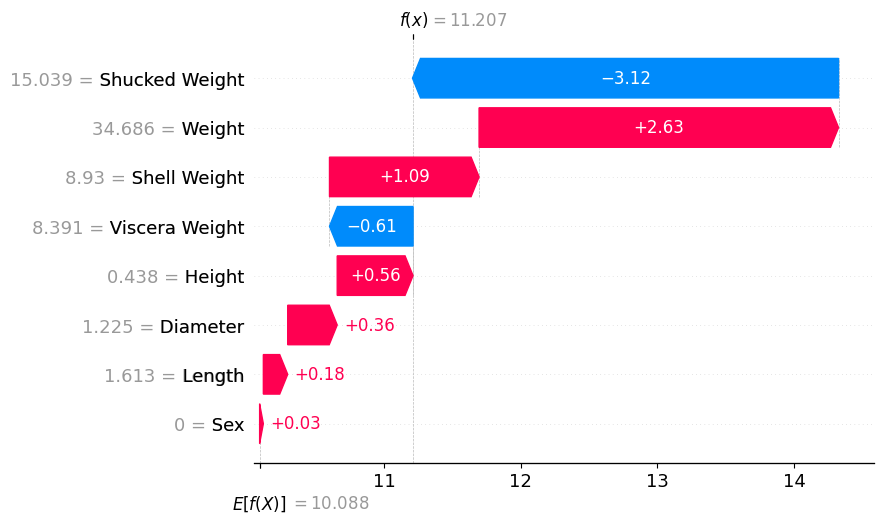

In [112]:
shap.waterfall_plot(shap.Explanation(values=instance_shap_values, 
                                     base_values=explainer.expected_value, 
                                     data=instance_data, 
                                     feature_names=X_test.columns))

In [113]:
lgb_model.save_model('model.lgb')